<a href="https://colab.research.google.com/github/K-Viera/Python/blob/main/DesicionAnalysis/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAR LIBRERÍAS
import numpy as np
import pandas as pd
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Extraccion datos


In [ ]:
tickers = ['AAPL', 'GOOGL', 'META', 'BABA','F','DIS']
datos = pd.DataFrame()
datosEmpresas = {} 
for t in tickers:
    datos[t] = yf.download(t, start = '2019-01-01')['Adj Close']
    datosEmpresas[t] = {}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Rendimiento promedio anual

## Retorno Simple


In [ ]:
serieRetornos = (datos/datos.shift(1))-1

for t in tickers:
  datosEmpresas[t]['retornoS']=serieRetornos[t].mean() * 250

In [ ]:
maxRetorno=('',float('-inf'))
for t in tickers:
  value=datosEmpresas[t]['retornoS']
  print(f'el retorno de la acción {t} es {(value)*100}%')
  if value>maxRetorno[1]:
    maxRetorno=(t,value)
maxName=maxRetorno[0]
maxValue=maxRetorno[1]
print()
print(f'el maximo retorno es el de la accion {maxName}, con un rendimiento de {(maxValue)*100}%')

el retorno de la acción AAPL es 46.348545831858786%
el retorno de la acción GOOGL es 27.020317997722458%
el retorno de la acción META es 14.632682419644116%
el retorno de la acción BABA es 0.9038870254076915%
el retorno de la acción F es 30.930390605243453%
el retorno de la acción DIS es 5.485993135295291%

el maximo retorno es el de la accion AAPL, con un rendimiento de 46.348545831858786%


## Retorno logaritmico


In [ ]:
retornoLogaritmico = np.log(datos/datos.shift(1))
for t in tickers:
  datosEmpresas[t]['retornoL']=retornoLogaritmico[t].mean() * 250

# Portafolios


In [ ]:
labelPortafolio=['escenario1','escenario2','escenario3','escenario4','escenario5']

portafolio={}
for p in labelPortafolio:
  portafolio[p]={}

portafolio[labelPortafolio[0]]['peso']=np.array([0.2 , 0.2 , 0.1 , 0.1 , 0.2, 0.2 ])
portafolio[labelPortafolio[1]]['peso']=np.array([0   , 0.5 , 0.05, 0.3 , 0  , 0.15])
portafolio[labelPortafolio[2]]['peso']=np.array([0.3 , 0.6 , 0   , 0.1 , 0  , 0   ])
portafolio[labelPortafolio[3]]['peso']=np.array([0.15, 0.15, 0.15, 0.15,0.2 , 0.2 ])
portafolio[labelPortafolio[4]]['peso']=np.array([0.5 , 0   , 0   , 0   ,0.5 , 0   ])

## Retorno anual promedio

In [ ]:
#Rendimiento
for p in labelPortafolio:
  portafolio[p]['retorno']=np.dot((serieRetornos.mean()*250),  portafolio[p]['peso'])

In [ ]:
for p in labelPortafolio:
  value=portafolio[p]['retorno']
  print(f'el retorno del portafolio {p} es de {(value)*100}%')

el retorno del portafolio escenario1 es de 23.510706458529178%
el retorno del portafolio escenario2 es de 15.335858197760038%
el retorno del portafolio escenario3 es de 30.20714325073188%
el retorno del portafolio escenario4 es de 20.619091739302707%
el retorno del portafolio escenario5 es de 38.63946821855112%


## Riesgo Portafolio

In [ ]:
matrizCovarianza = retornoLogaritmico.cov()
matrizCovarianzaAnual = matrizCovarianza * 250

for p in labelPortafolio:
  portafolio[p]['varianza']=np.dot(portafolio[p]['peso'].T, np.dot(matrizCovarianzaAnual, portafolio[p]['peso']))
  portafolio[p]['volatilidad']=np.sqrt(portafolio[p]['varianza'])

In [ ]:
for p in labelPortafolio:
  value=portafolio[p]['volatilidad']
  print(f'la volatilidad del protafolio {p} es de {(value)*100}%')

la volatilidad del protafolio escenario1 es de 28.060788259455467%
la volatilidad del protafolio escenario2 es de 29.4707704215481%
la volatilidad del protafolio escenario3 es de 29.310419525641258%
la volatilidad del protafolio escenario4 es de 28.515337651520227%
la volatilidad del protafolio escenario5 es de 33.00594720586197%


### Retorno por accion

In [ ]:
for p in labelPortafolio:
  portafolio[p]['sha']=( portafolio[p]['retorno'] - 0.1)/ math.sqrt( portafolio[p]['varianza'])

In [ ]:
maxRetorno=('',float('-inf'))
for p in labelPortafolio:
  value=portafolio[p]['sha']
  print(f'el indice de sharpee del portafolio {p} es de {value}')
  if value>maxRetorno[1]:
    maxRetorno=(p,value)

maxName=maxRetorno[0]
maxValue=maxRetorno[1]
print()
print(f'el maximo retorno es el del portafolio {maxName} con un indice de sharpee del {maxValue}')

el indice de sharpee del portafolio escenario1 es de 0.48147993326511634
el indice de sharpee del portafolio escenario2 es de 0.1810559453124655
el indice de sharpee del portafolio escenario3 es de 0.6894184244976201
el indice de sharpee del portafolio escenario4 es de 0.3723992985486032
el indice de sharpee del portafolio escenario5 es de 0.867706296684152

el maximo retorno es el del portafolio escenario5 con un indice de sharpee del 0.867706296684152


#Simulacion montecarlo para volatilidad

Simulacion accion AAPL


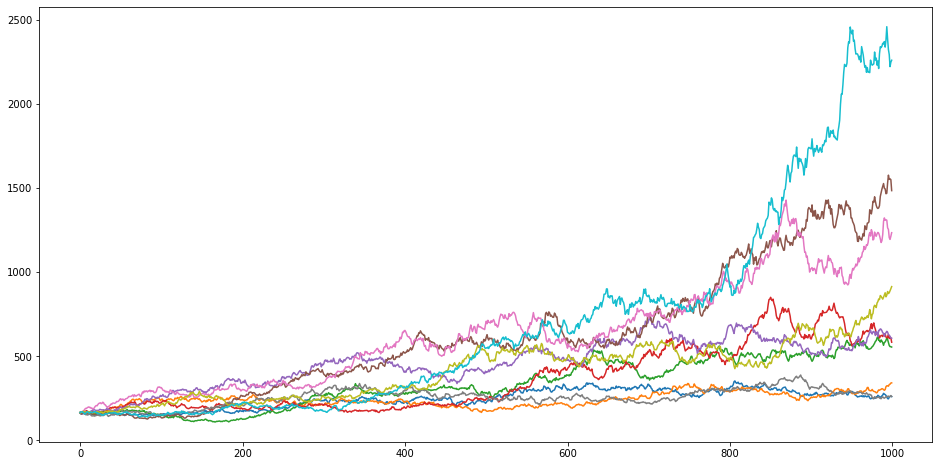

Simulacion accion GOOGL


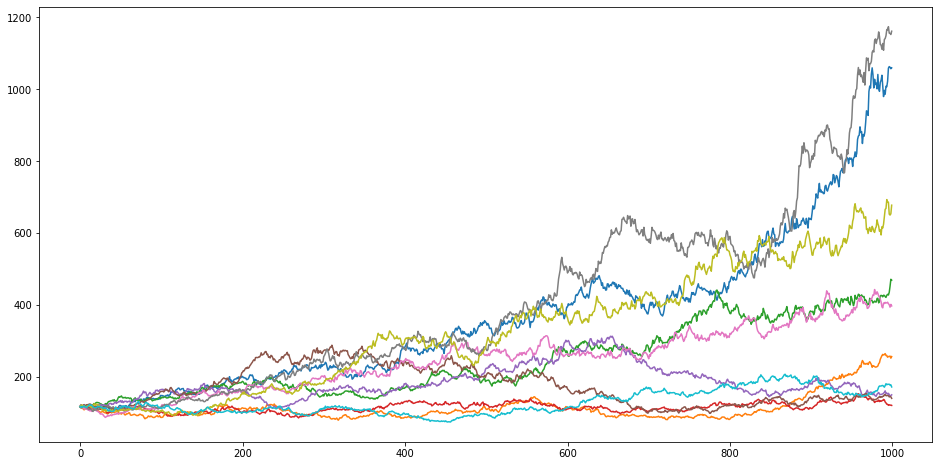

Simulacion accion META


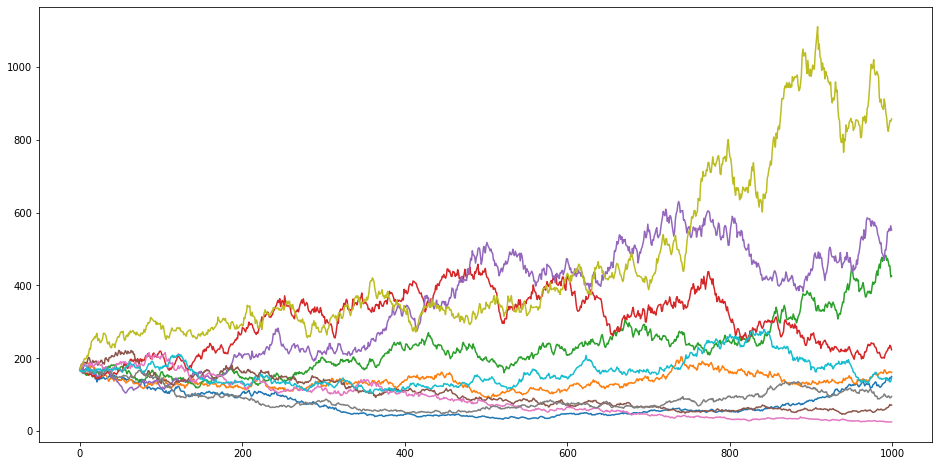

In [ ]:
escenarios = 10
pasos = 1000


act=['AAPL', 'GOOGL', 'META']

for p in act:
  rLog=datos[p].pct_change()
  u=rLog.mean()
  var=rLog.var()
  tendencia=u-(0.5*var)
  desv=rLog.std()
  retornosDiarios=np.exp(tendencia + desv * norm.ppf(np.random.rand(pasos, escenarios)))
  listaPrecios = np.zeros_like(retornosDiarios)
  listaPrecios[0] = datos[p].iloc[-1]
  for t in range(1, pasos):
    listaPrecios[t] = listaPrecios[t - 1] * retornosDiarios[t]
  print(f'Simulacion accion {p}')
  plt.figure(figsize =(16,8))
  plt.plot(listaPrecios)
  plt.show()



# Black-shores


In [ ]:
dataApple = pd.DataFrame()
dataApple ['AAPL'] = yf.download('AAPL', start = '2019-01-01')['Adj Close']

#Función para d1
def d1(S, K, r, desv, T):
  return (np.log(S/K) + (r + desv**2 / 2) * T)/(desv * np.sqrt(T))

#Función para d2
def d2(S, K, r, desv, T):
  return (np.log(S/K) + (r - desv**2 / 2) * T)/(desv * np.sqrt(T))

#Fórmula de Black - Scholes
def BSF ( S, K, r, desv, T):
  return (S * norm.cdf(d1(S, K, r, desv, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, desv, T)))

retornoLogaritmicoApple = np.log(1 + dataApple.pct_change())
desvApple = retornoLogaritmicoApple.std() * 250 ** 0.5
desvApple

[*********************100%***********************]  1 of 1 completed


AAPL    0.341394
dtype: float64

In [ ]:
ticker2 = 'F'
dataF = pd.DataFrame()
dataF [ticker2] = yf.download(ticker2, start = '2019-01-01')['Adj Close']

retornoLogaritmicoF = np.log(1 + dataF.pct_change())
desvF = retornoLogaritmicoF.std() * 250 ** 0.5
desvF

#Tiempo de maduracióno vencimiento: 2 años.
#Tasa libre de riesgo anual: 2.5%
#Precio determinado o strike: AAPL = 162 y F = 15

r = 0.025
T = 2
K1 = 162
K2 = 15

P0_Apple = dataApple.iloc[-1]
d1(P0_Apple, K1, r, desvApple, T)
P0_F = dataF.iloc[-1]
d1(P0_F, K2, r, desvF, T)
d2(P0_Apple, K1, r, desvApple, T)
d2(P0_F, K2, r, desvF, T)

BSF(P0_Apple, K1, r, desvApple, T)
BSF(P0_F, K2, r, desvF, T)

tIntervalos = 250
deltaT = T / tIntervalos
iteraciones = 10000

[*********************100%***********************]  1 of 1 completed


<function matplotlib.pyplot.plot>

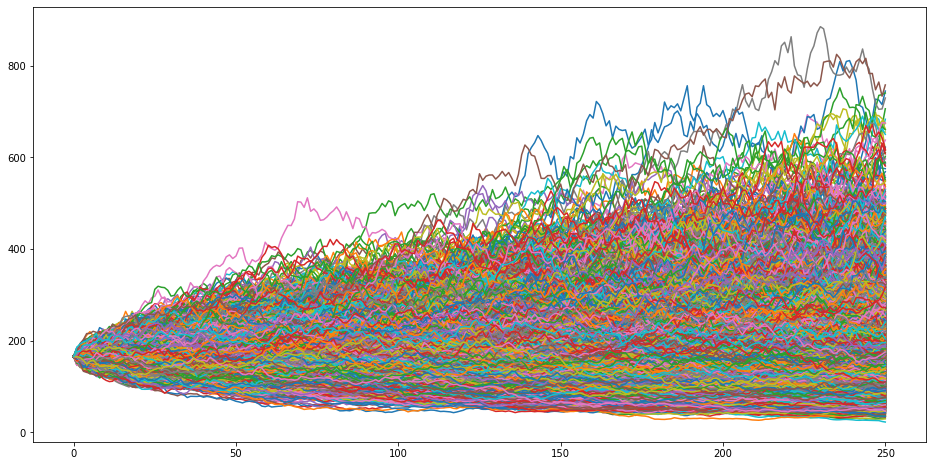

In [ ]:
Z = np.random.standard_normal((tIntervalos+1, iteraciones))
S1 = np.zeros_like(Z)
S1[0] = P0_Apple
S2 = np.zeros_like(Z)
S2[0] = P0_F
for t in range (1, tIntervalos + 1): 
  S1[t] = S1[t - 1] * np.exp(((r - 0.5 * desvApple.values ** 2) * deltaT) + desvApple.values * np.sqrt(deltaT) * Z[t])
plt.figure(figsize = (16,8))
plt.plot(S1)
plt.plot

In [ ]:
for t in range (1, tIntervalos + 1): 
  S2[t] = S2[t - 1] * np.exp(((r - 0.5 * desvF.values ** 2) * deltaT) + desvF.values * np.sqrt(deltaT) * Z[t])
  
plt.figure(figsize = (16,8))
plt.plot(S2)
plt.plot

In [ ]:
p1 = np.maximum(S1[-1] - K1,0) #Nos ponga el máximo valor entre la resta y cero, S[-1] es la última posición
p1

In [ ]:
p2 = np.maximum(S2[-1] - K2,0) #Nos ponga el máximo valor entre la resta y cero, S[-1] es la última posición
p2

In [ ]:
c1 = np.exp(-r*T)* np.sum(p1) / iteraciones
c1

In [ ]:
c2 = np.exp(-r*T)* np.sum(p2) / iteraciones
c2